# Machine Learning

## Inhalt ##

1. Frage 1: Wie häufig nutzt du soziale Medien? (Regression & Klassifikation)<br>
    1.1 Train-Test Split der Daten<br> 
    1.2 Suche nach dem besten Regressionsmodell<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.1 Linear Regression<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.2 k-NN Regressor<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.3 Random Forest Regressor<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.4 Gradient Boosting Regressor<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.2.5 Ergebnis<br> 
    1.3 Suche nach dem besten Klassifikationsmodell<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.3.1 Random Forest Classifier<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.3.2 k-NN Classifier<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.3.3 Gradient Boosting Classifier<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.3.4 Ergebnis<br> 
    1.4 Bestes Modell für Frage 1 <br> 
2. Frage 2: Was ist deine Lieblingsgenre anhand von Lieblingsband bzw. Lieblings-Musiker*in? (Klassifikation)<br> 
    2.1 Train-Test Split der Daten<br> 
    2.2 Suche nach dem besten Klassifikationsmodell<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.1 Random Forest Classifier<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.2 k-NN Classifier<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.3 Gradient Boosting Classifier<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2.4 Ergebnis<br> 
    2.3 Bestes Modell für Frage 2<br> 
3. Frage 3: Alter? (Regression)<br> 
    3.1 Train-Test Split der Daten<br> 
    3.2 Suche nach dem besten Regressionsmodell<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.1 Linear Regression<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.2 k-NN Regressor<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.3 Random Forest Regressor<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.4 Gradient Boosting Regressor<br> 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2.5 Ergebnis<br> 
    3.3 Bestes Modell für Frage 3 <br>

In [1]:
%store -r columns_encoded
%store -r columns
%store -r data
%store -r data_encoded

%store -r df_genres

columns_encoded = columns_encoded
columns = columns
data = data
data_encoded = data_encoded

df_genres = df_genres

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import local_helpers as lh

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# 1. Frage 1: Wie häufig nutzt du soziale Medien? (Regression & Klassifikation) 
Im folgenden werden wir verschiedene Machine Learning Modelle testen, um die Antwort auf die Frage "Wie häufig nutzt du soziale Medien?" mithilfe der anderen Antworten auf Fragen zu schätzen. Da diese Frage sowohl als Regressions- als auch Klassifikationsproblem angesehen werden kann, nutzen wir Modelle für beide Varianten und vergleichen die Ergebnisse im Weiteren.

## 1.1 Train-Test Split der Daten
Teile die Daten in Label (y) und Rest der Daten (X) und splite die Daten in Trainings- und Test-Daten, um die Modelle zu trainieren und danach mit den Test-Daten zu vergleichen.

In [3]:
#Split label vom Rest der Daten
y_data_q1 = data_encoded[columns_encoded.social_media]
X_data_q1 = data_encoded.drop(columns_encoded.social_media, axis=1)

In [4]:
# Train-test split
X_train_q1, X_test_q1, y_train_q1, y_test_q1 = train_test_split(X_data_q1, y_data_q1, test_size=0.2, random_state=42)

## 1.2 Suche nach dem besten Regressionsmodell

### 1.2.1 Linear Regression

1. Definieren der Pipeline für das Linear Regression Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [5]:
# Pipeline definieren
pipe_LR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

2. Trainieren des Linear Regression Modells.

In [6]:
pipe_LR_q1.fit(X_train_q1, y_train_q1)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

3. Mit dem trainierten Linear Regression Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [7]:
prediction_LR_q1 = pipe_LR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_LR_q1)

1.098397781404444

4. Wahre Daten und geschätzte Daten auf einem Graphen gegenüberstellen.

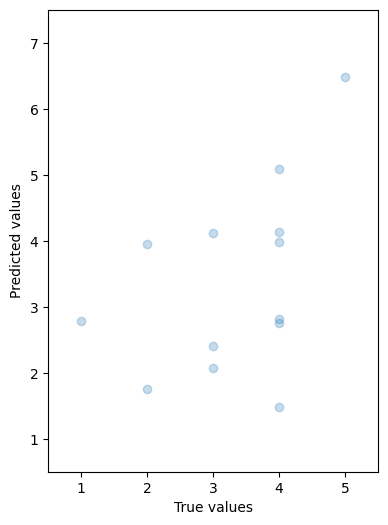

In [8]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_LR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
plt.xlim([0.5, 5.5])
plt.xticks(range(1, 6))
plt.ylim([0.5, 7.5])
plt.yticks(range(1, 8))
plt.gca().set_aspect('equal', adjustable='box')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 1.10 nicht wirklich gut. Das Modell ist somit vermutlich nicht optimal. Zudem fällt negativ auf, dass das Modell auch Werte über 5 schätzt und somit Werte, welche nie eintreten können.

### 1.2.2 k-NN Regressor

1. Definieren der Pipeline für das k-NN Regressor Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [9]:
# Pipeline definieren
pipe_kNNR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe_kNNR_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das kNN-Regressor Modell.

In [10]:
# Grid Search nach den besten Parametern für das Modell k-NN Regressor
grid_kNNR_q1 = GridSearchCV(estimator=pipe_kNNR_q1,
                   param_grid={
                     'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                     'model__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                     'model__leaf_size': [3, 10, 20, 30, 50, 100],
                     'model__p': [1, 2, 3],
                     'model__metric': ['minkowski', 'precomputed']
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE")

grid_kNNR_q1.fit(X_data_q1, y_data_q1)

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1512 fits failed out of a total of 3024.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
378 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/carlobeckmann/miniconda3/envs/data

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__algorithm': ['ball_tree', 'kd_tree', 'brute',
                                              'auto'],
                         'model__leaf_size': [3, 10, 20, 30, 50, 100],
                         'model__metric': ['minkowski', 'precomputed'],
                         'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                         'model__p': [1, 2, 3]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)})

3. Mit dem trainierten k-NN Regressor Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [11]:
prediction_kNNR_q1 = grid_kNNR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_kNNR_q1)

0.8615384615384616

4. Wahre Daten und geschätzte Daten auf ein Graphen gegenüberstellen.

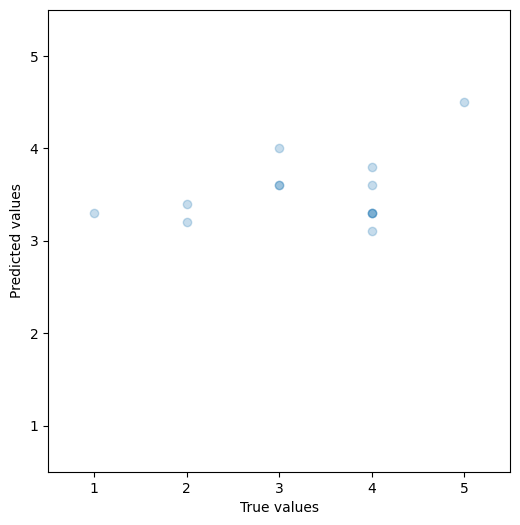

In [12]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_kNNR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
plt.xlim([0.5, 5.5])
plt.xticks(range(1, 6))
plt.ylim([0.5, 5.5])
plt.yticks(range(1, 6))
plt.gca().set_aspect('equal', adjustable='box')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 0,86 ist für die wenigen Datenpunkten auf denen das Modell trainiert wurde mit einem Wert unter 1 gar nicht schlecht, aber auch nicht optimal (bei einem Wertebereich von 1 bis 5). Es fällt auf, dass das k-NN Regressor Modell nur Werte im Bereich zwischen ca. 3 und 5 schätzt, obwohl die wahren Werte auch Ausreißer beinhalten.

### 1.2.3 Random Forest Regressor

1. Definieren der Pipeline für das Random Forest Regressor Modell mit mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [13]:
pipe_RFR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestRegressor())
])

pipe_RFR_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': None,
 'model__max_features': 1.0,
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das Random Forest Regressor Modell.

In [14]:
grid_RFR_q1 = GridSearchCV(estimator=pipe_RFR_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFR_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_es

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

3. Mit dem trainierten Random Forest Regressor Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [15]:
prediction_RFR_q1 = grid_RFR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_RFR_q1)

0.8886404194096501

4. Wahre Daten und geschätzte Daten auf ein Graphen gegenüberstellen.

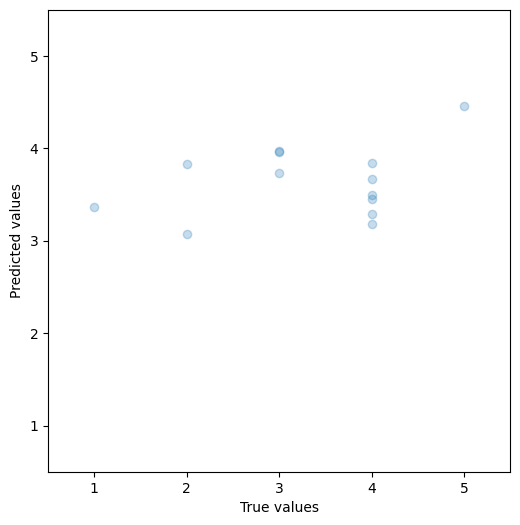

In [16]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_RFR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
plt.xlim([0.5, 5.5])
plt.xticks(range(1, 6))
plt.ylim([0.5, 5.5])
plt.yticks(range(1, 6))
plt.gca().set_aspect('equal', adjustable='box')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 0,89 für die wenigen Datenpunkten auf denen das Modell trainiert wurde mit einem Wert unter 1 gar nicht schlecht, aber auch nicht optimal (bei einem Wertebereich von 1 bis 5). Es fällt auf, dass das Random Forest Modell nur Werte im Bereich zwischen ca. 2 und 5 schätzt, obwohl die wahren Werte auch Ausreißer beinhalten. Zudem war das k-NN Regressor Modell mit einem Wert von 0,86 minimal besser.

### 1.2.4 Gradient Boosting Regressor

1. Definieren der Pipeline für das Gradient Boosting Regressor Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [17]:
pipe_GBR_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingRegressor(loss='absolute_error'))
])

pipe_GBR_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingRegressor(loss='absolute_error'))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingRegressor(loss='absolute_error'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__alpha': 0.9,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'absolute_error',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das Gradient Boosting Regressor Modell.

In [18]:
grid_GBR_q1 = GridSearchCV(estimator=pipe_GBR_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBR_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__su

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingRegressor(loss='absolute_error'))]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

3. Mit dem trainierten Gradient Boosting Regressor Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [19]:
prediction_GBR_q1 = grid_GBR_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_GBR_q1)

0.7263711706950686

4. Wahre Daten und geschätzte Daten auf ein Graphen gegenüberstellen.

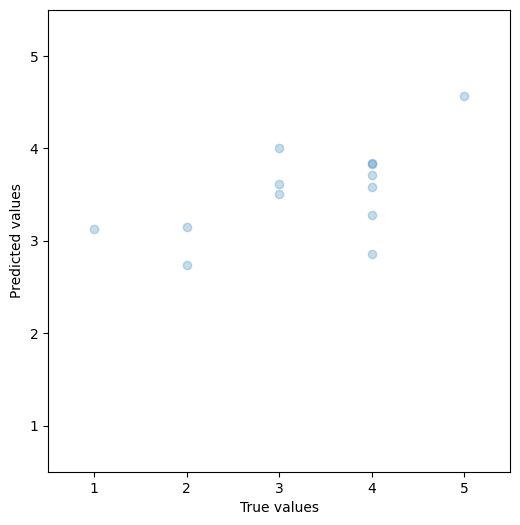

In [20]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q1, prediction_GBR_q1, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
plt.xlim([0.5, 5.5])
plt.xticks(range(1, 6))
plt.ylim([0.5, 5.5])
plt.yticks(range(1, 6))
plt.gca().set_aspect('equal', adjustable='box')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 0,73 für die wenigen Datenpunkten auf denen das Modell trainiert wurde mit einem Wert unter 1 gar nicht schlecht, aber auch nicht optimal (bei einem Werte Bereich von 1 bis 5).

### 1.2.5 Ergebnis
Das beste performende Regressor Modell für diese Frage und unsere Datengrundlage ist das Gradient Boosting Regressor Modell mit einem Mean-Absolute-Error von ca 0,73. Random Forest Regressor und k-NN Regressor schneiden mit Werten unter 1 ähnlich gut ab, sind aber beide etwas schlechter als Gradient Boosting. Das Lineare Regression Modell hingegen hat mit einem Wert knapp über 1 nicht wirklich gut performt und liefert auch als einziges Modell Werte außerhalb des Wertebereiches.

Im weiteren werden wir verschiedene Klassifikations Modelle testen, um dann das beste mit dem Gradient Boosting Regressor Modell zuvergleichen.

## 1.3 Suche nach dem besten Klassifikationsmodell

### 1.3.1 Random Forest Classifier

1. Definieren der Pipeline für das Random Forest Classifier Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [21]:
pipe_RFC_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestClassifier())
])

pipe_RFC_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das Random Forest Classifier Modell.

In [22]:
grid_RFC_q1 = GridSearchCV(estimator=pipe_RFC_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFC_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s


/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=3, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

3. Mit dem trainierten Random Forest Classifier Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [23]:
prediction_RFC_q1 = grid_RFC_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_RFC_q1)

0.6153846153846154

4. Wahre Daten und geschätzte Daten mit einer Confusion Matrix in einem Graphen auftragen, um damit die Modelle zu vergleichen.

Text(33.22222222222222, 0.5, 'True labels')

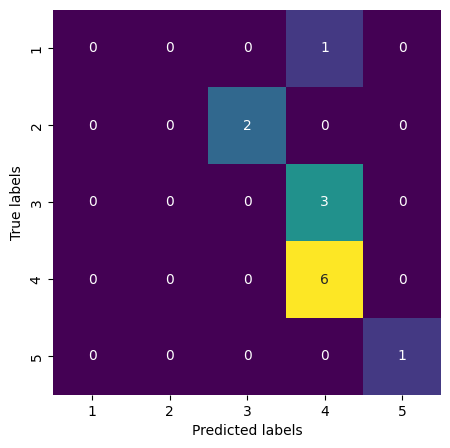

In [24]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q1, prediction_RFC_q1, labels=grid_RFC_q1.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q1.classes_,
           yticklabels=grid_RFC_q1.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 0,62 erstaunlich gut, für die eigentlich schlechte Datengrundlage. Es fällt dabei aber auf, dass das Random Forest Classifier Modell fast ausschließlich den Wert 4 schätz, welcher zwar auch am häufigsten angegeben wurde, aber auch alle Ausreißer werden von dem Modell dort einsortiert. Es könnte somit auch sein, dass das Random Forest Classifier Modell etwas overfitted ist.

### 1.3.2 k-NN Classifier

1. Definieren der Pipeline für das k-NN Classifier Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [25]:
pipe_kNNC_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

pipe_kNNC_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das k-NN Classifier Modell.

In [26]:
grid_kNNC_q1 = GridSearchCV(estimator=pipe_kNNC_q1,
                   param_grid={
                      'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                      'model__leaf_size': [5, 15, 30, 50, 100, 200],
                      'model__p': [1, 2, 4],
                      'model__weights': ['uniform', 'distance']
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_kNNC_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform;

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_nei

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [5, 15, 30, 50, 100, 200],
                         'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                         'model__p': [1, 2, 4],
                         'model__weights': ['uniform', 'distance']},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

3. Mit dem trainierten k-NN Classifier Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [27]:
prediction_kNNC_q1 = grid_kNNC_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_kNNC_q1)

0.7692307692307693

4. Wahre Daten und geschätzte Daten mit einer Confusion Matrix in einem Graphen auftragen, um damit die Modelle zu vergleichen.

Text(33.22222222222222, 0.5, 'True labels')

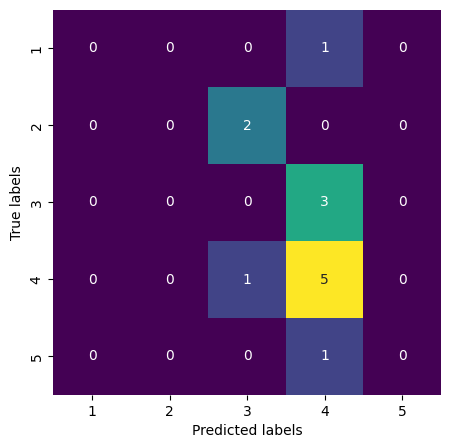

In [28]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q1, prediction_kNNC_q1, labels=grid_RFC_q1.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q1.classes_,
           yticklabels=grid_RFC_q1.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 0,77 recht gut, für die eigentlich schlechte Datengrundlage. Das k-NN Classifier Modell hat somit einen ähnlichen Mean-Absolute-Erorrs Wert. Es fällt aber auf, dass die Werte von dem Modell etwas mehr gestreut sind und nicht nur ausschließlich der Wert 4 geschätzt wird.

### 1.3.3 Gradient Boosting Classifier

1. Definieren der Pipeline für das Gradient Boosting Classifier Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [29]:
pipe_GBC_q1 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingClassifier())
])

pipe_GBC_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'log_loss',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das Gradient Boosting Classifier Modell.

In [30]:
grid_GBC_q1 = GridSearchCV(estimator=pipe_GBC_q1,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBC_q1.fit(X_train_q1, y_train_q1)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__su

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=50, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=50, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, mo

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

3. Mit dem trainierten Gradient Boosting Classifier Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [31]:
prediction_GBC_q1 = grid_GBC_q1.predict(X_test_q1)

mean_absolute_error(y_test_q1, prediction_GBC_q1)

0.9230769230769231

4. Wahre Daten und geschätzte Daten mit einer Confusion Matrix in einem Graphen auftragen, um damit die Modelle zu vergleichen.

Text(33.22222222222222, 0.5, 'True labels')

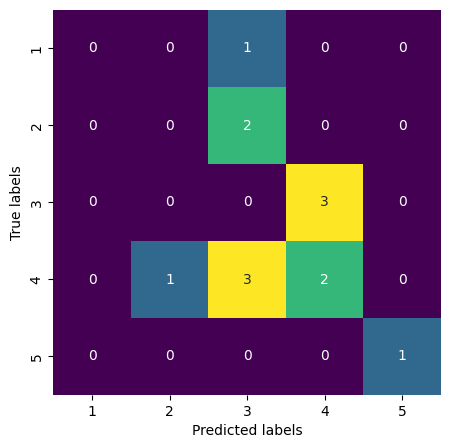

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q1, prediction_GBC_q1, labels=grid_RFC_q1.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q1.classes_,
           yticklabels=grid_RFC_q1.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 0,92 nicht gut. Das Gradient Boosting Classifier Modell streut dabei viel mehr als die beiden Modelle davor. Ausreißer werden aber falsch eingeschätzt und auch eigentliche Werte bei 3 und 4 schwanken sehr im Bereich von 2 bis 4.

### 1.3.4 Ergebnis
Das beste performende Klassifikations Modell für diese Frage und unsere Datengrundlage ist das Random Forest Classifier Modell mit einem Mean-Absolute-Error von ca 0,62. Das k-NN Classifier Modell und das Gradient Boosting Classifier Modell haben beide mit einem Mean-Absolute-Error Wert unter 1 auch nicht so schlecht funktioniert.

## 1.4 Bestes Modell für Frage 1
Das insgesamt beste Modell für die Frage "Wie häufig nutzt du soziale Medien?" ist gemessen am Mean-Absolute-Error das Random Forest Classifier Modell und somit etwas besser als das Gradient Boosting Regressor Modell.

In [33]:
best_model_q1 = grid_RFC_q1.best_estimator_
best_model_q1.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', RandomForestClassifier(max_depth=6, n_estimators=200))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestClassifier(max_depth=6, n_estimators=200),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': 6,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 200,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

# 2. Frage 2: Was ist deine Lieblingsgenre anhand von Lieblingsband bzw. Lieblings-Musiker*in? (Klassifikation)
Im folgenden werden wir verschiedene Machine Learning Modelle testen, um die Antworten auf die Frage "Was ist deine Lieblingsgenre anhand von Lieblingsband bzw. Lieblings-Musiker*in?" mithilfe der Anworten auf andere Fragen zu schätzen. Dafür werden verschiedene Klassifikationsmodelle von uns verglichen, um das beste Modell zu ermitteln.

In [34]:
#Split label vom Rest der Daten
y_data_q2 = df_genres
X_data_q2 = data_encoded
for column in columns_encoded.keys():
    if column.startswith("genre_"):
        X_data_q2, _ = lh.remove_column_from_data_and_short_labels(X_data_q2, columns_encoded, column)

## 2.1 Train-Test Split der Daten
Teile die Daten in Label (y) und Rest der Daten (X) und splitte die Daten in Trainings- und Testdaten, um die Modelle zu trainieren und danach mit den Testdaten zu vergleichen.

In [35]:
# Train-test split
X_train_q2, X_test_q2, y_train_q2, y_test_q2 = train_test_split(X_data_q2, y_data_q2, test_size=0.2, random_state=42)

## 2.2 Suche nach dem besten Klassifikationsmodell

### 2.2.1 Random Forest Classifier

1. Definieren der Pipeline für das Linear Regression Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [36]:
pipe_RFC_q2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestClassifier())
])

pipe_RFC_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das Random Forest Classifier Modell.

In [37]:
grid_RFC_q2 = GridSearchCV(estimator=pipe_RFC_q2,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   cv=3, verbose=2)

grid_RFC_q2.fit(X_train_q2, y_train_q2)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s


/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=3, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=3, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             verbose=2)

3. Wahre Daten und geschätzte Daten mit einer Confusion Matrix in einem Graphen auftragen, um damit die Modelle zu vergleichen.

Text(33.222222222222214, 0.5, 'True labels')

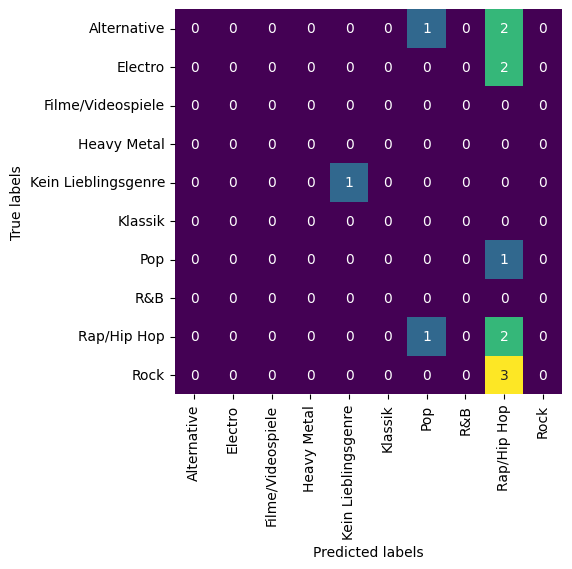

In [38]:
prediction_RFC_q2 = grid_RFC_q2.predict(X_test_q2)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q2, prediction_RFC_q2, labels=grid_RFC_q2.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q2.classes_,
           yticklabels=grid_RFC_q2.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

#### Beobachtung: 
Das Random Forest Classifier Modell ist mit 3 richtigen Predictions von 13 nicht wirklich gut, was vermutlich an den wenigen zu Grunde liegenden Daten liegt.

### 2.2.2 k-NN Classifier

1. Definieren der Pipeline für das Linear Regression Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [39]:
pipe_kNNC_q2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

pipe_kNNC_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das k-NN Classifier Modell.

In [40]:
grid_kNNC_q2 = GridSearchCV(estimator=pipe_kNNC_q2,
                   param_grid={
                      'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                      'model__leaf_size': [5, 15, 30, 50, 100, 200],
                      'model__p': [1, 2, 4],
                      'model__weights': ['uniform', 'distance']

                   },
                   cv=3, verbose=2)

grid_kNNC_q2.fit(X_train_q2, y_train_q2)

Fitting 3 folds for each of 216 candidates, totalling 648 fits
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=2, model__p=2, model__weights=uniform;

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__leaf_size=5, model__n_neighbors=4, model__p=4, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=1, model__weights=distance; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neighbors=5, model__p=2, model__weights=uniform; total time=   0.0s
[CV] END model__leaf_size=5, model__n_neig

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__leaf_size': [5, 15, 30, 50, 100, 200],
                         'model__n_neighbors': [2, 3, 4, 5, 7, 10],
                         'model__p': [1, 2, 4],
                         'model__weights': ['uniform', 'distance']},
             verbose=2)

3. Wahre Daten und geschätzte Daten mit einer Confusion Matrix in einem Graphen auftragen, um damit die Modelle zu vergleichen.

Text(33.222222222222214, 0.5, 'True labels')

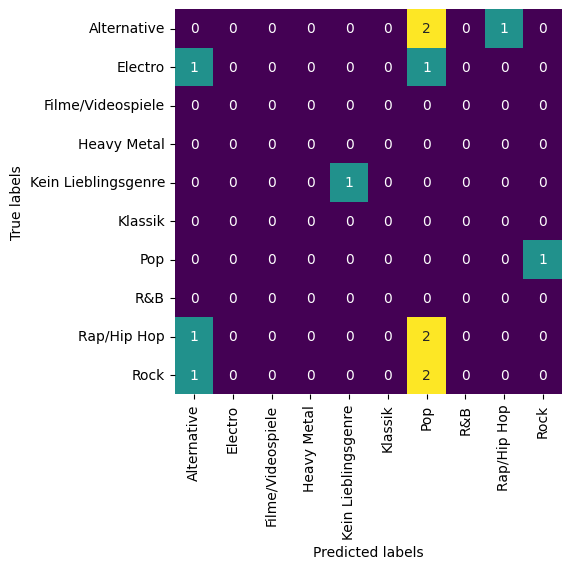

In [41]:
prediction_kNNC_q2 = grid_kNNC_q2.predict(X_test_q2)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q2, prediction_kNNC_q2, labels=grid_RFC_q2.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q2.classes_,
           yticklabels=grid_RFC_q2.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

#### Beobachtung: 
Das k-NN Classifier Modell ist mit einer richtigen Predictions von 13 sehr schlecht, was vermutlich an den wenigen zu Grunde liegenden Daten liegt.

### 2.2.3 Gradient Boosting Classifier

1. Definieren der Pipeline für das Linear Regression Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [42]:
pipe_GBC_q2 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingClassifier())
])

pipe_GBC_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'log_loss',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das Gradient Boosting Classifier Modell.

In [43]:
grid_GBC_q2 = GridSearchCV(estimator=pipe_GBC_q2,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   cv=3, verbose=2)

grid_GBC_q2.fit(X_train_q2, y_train_q2)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s


/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.7; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=1; total time=   0.0s
[CV] END model__learning_rate=0.01, 

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingClassifier())]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             verbose=2)

3. Wahre Daten und geschätzte Daten mit einer Confusion Matrix in einem Graphen auftragen, um damit die Modelle zu vergleichen.

Text(33.222222222222214, 0.5, 'True labels')

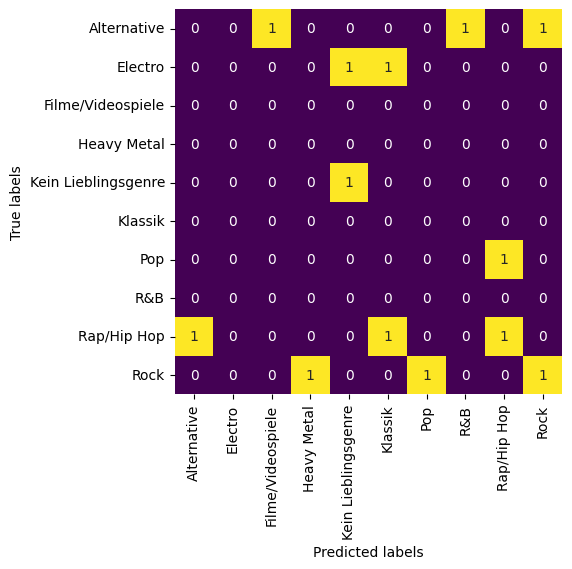

In [44]:
prediction_GBC_q2 = grid_GBC_q2.predict(X_test_q2)

fig, ax = plt.subplots(figsize=(5, 5))

sb.heatmap(confusion_matrix(y_test_q2, prediction_GBC_q2, labels=grid_RFC_q2.classes_),
           annot=True, cmap="viridis", cbar=False,
           xticklabels=grid_RFC_q2.classes_,
           yticklabels=grid_RFC_q2.classes_)

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')

#### Beobachtung: 
Das Gradient Boosting Classifier Modell ist mit 3 richtigen Predictions von 13 nicht wirklich gut, was vermutlich an den wenigen zu Grunde liegenden Daten liegt.

### 2.2.4 Ergebnis:
Alle Modelle haben wegen den wenigen Datenpunkten keine guten Ergebnisse erziehlt. Das k-NN Classifier Modell hat dabei am schlechtesten abgeschnitten. Die Random Forest und Gradient Boosting Classifier Modelle haben ähnlich gut performt und lieferten ähnliche Ergebnisse.

## 2.3 Bestes Modell für Frage 2
Das beste Modell für die Frage nach dem Lieblingsgenre der Proband*innen wäre das Random Forest Classifier oder das Gradient Boosting Classifier Modell. Wir haben uns am Ende für das Gradient Boosting Classifier Modell entschieden.

In [45]:
best_model_q2 = grid_GBC_q2.best_estimator_
best_model_q2.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingClassifier(max_depth=5, subsample=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingClassifier(max_depth=5, subsample=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'log_loss',
 'model__max_depth': 5,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

# 3. Frage 3: Alter? (Regression)
Im Folgenden werden wir verschiedene Machine Learning Modelle testen, um das Alter mithilfe der anderen Fragen zu schätzen. Dafür werden verschiedene Regressionsmodelle von uns verglichen, um das beste Modell zu ermitteln.

In [46]:
#Split label vom Rest der Daten

y_data_q3 = data_encoded[columns_encoded.alter]
X_data_q3 = data_encoded.drop(columns_encoded.alter, axis=1)

## 3.1 Train-Test Split der Daten
Teile die Daten in Label (y) und Rest der Daten (X) und splite die Daten in Trainings- und Test-Daten, um die Modelle zu trainieren und danach mit den Test-Daten zu vergleichen.

In [47]:
# Train-test split
X_train_q3, X_test_q3, y_train_q3, y_test_q3 = train_test_split(X_data_q3, y_data_q3, test_size=0.2, random_state=42)

## 3.2 Suche nach dem besten Regressionsmodell

### 3.2.1 Linear Regression

1. Definieren der Pipeline für das Linear Regression Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [48]:
# Pipeline definieren
pipe_LR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", LinearRegression())
])

2. Trainieren des Linear Regression Modells

In [49]:
pipe_LR_q3.fit(X_train_q3, y_train_q3)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

3. Mit dem trainierten Linear Regression Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [50]:
prediction_LR_q3 = pipe_LR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_LR_q3)

5.875775569967088

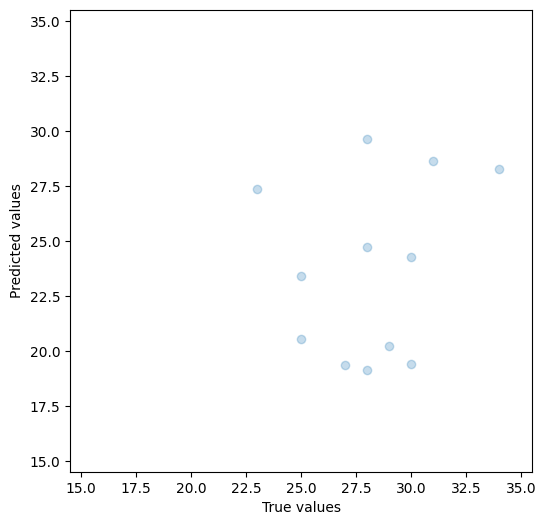

In [51]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_LR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
plt.xlim([14.5, 35.5])
plt.ylim([14.5, 35.5])
plt.gca().set_aspect('equal', adjustable='box')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 5,88 nicht gut. Somit weicht die Schätzung des Linear Regression Modells stark von den echten Werten ab.

### 3.2.2 k-NN Regressor

1. Definieren der Pipeline für das Linear Regression Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [52]:
# Pipeline definieren
pipe_kNNR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])

pipe_kNNR_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das k-NN Regressor Modell.

In [53]:
# Grid Search nach den besten Parametern für das Modell k-NN Regressor
grid_kNNR_q3 = GridSearchCV(estimator=pipe_kNNR_q3,
                   param_grid={
                     'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                     'model__algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                     'model__leaf_size': [3, 10, 20, 30, 50, 100],
                     'model__p': [1, 2, 3],
                     'model__metric': ['minkowski', 'precomputed']
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE")

grid_kNNR_q3.fit(X_data_q3, y_data_q3)

/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1512 fits failed out of a total of 3024.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
378 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/carlobeckmann/miniconda3/envs/data_science/lib/python3.9/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/carlobeckmann/miniconda3/envs/data

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__algorithm': ['ball_tree', 'kd_tree', 'brute',
                                              'auto'],
                         'model__leaf_size': [3, 10, 20, 30, 50, 100],
                         'model__metric': ['minkowski', 'precomputed'],
                         'model__n_neighbors': [1, 2, 4, 5, 10, 20, 25],
                         'model__p': [1, 2, 3]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)})

3. Mit dem trainierten k-NN Regressor Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [54]:
prediction_kNNR_q3 = grid_kNNR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_kNNR_q3)

2.3461538461538463

4. Wahre Daten und geschätzte Daten auf ein Graphen gegenüberstellen.

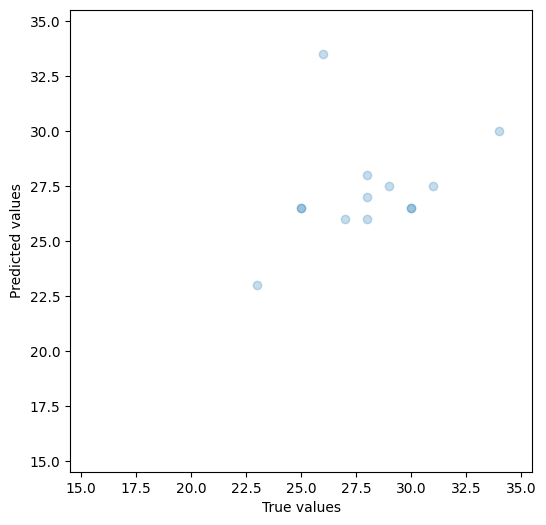

In [55]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_kNNR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
plt.xlim([14.5, 35.5])
plt.ylim([14.5, 35.5])
plt.gca().set_aspect('equal', adjustable='box')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 2,35 für die wenigen Daten und dem Wertebereich gar nicht schlecht. Das k-NN Regressor Modell liefert meist sehr nahe Schätzungen an den echten Werten. Dies ist auch in dem Graphen zu erkennen, da die Punkte in einem recht linearen Verlauf dargestellt werden.

### 3.2.3 Random Forest Regressor

1. Definieren der Pipeline für das Linear Regression Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [56]:
pipe_RFR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", RandomForestRegressor())
])

pipe_RFR_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'squared_error',
 'model__max_depth': None,
 'model__max_features': 1.0,
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das Random Forest Regressor Modell.

In [57]:
grid_RFR_q3 = GridSearchCV(estimator=pipe_RFR_q3,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_RFR_q3.fit(X_train_q3, y_train_q3)

Fitting 3 folds for each of 28 candidates, totalling 84 fits
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=20; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END .........model__max_depth=2, model__n_estimators=50; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=100; total time=   0.0s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_estimators=200; total time=   0.1s
[CV] END ........model__max_depth=2, model__n_es

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [2, 3, 4, 6, 8, 10, 20],
                         'model__n_estimators': [20, 50, 100, 200]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

3. Mit dem trainierten Random Forest Regressor Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [58]:
prediction_RFR_q3 = grid_RFR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_RFR_q3)

3.2092075181903112

4. Wahre Daten und geschätzte Daten auf ein Graphen gegenüberstellen.

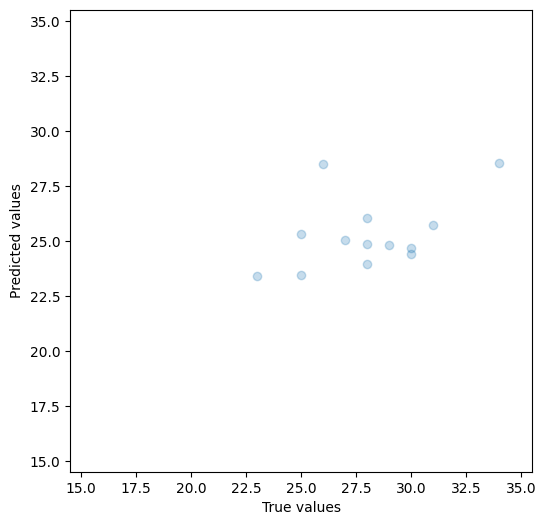

In [59]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_RFR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
plt.xlim([14.5, 35.5])
plt.ylim([14.5, 35.5])
plt.gca().set_aspect('equal', adjustable='box')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 3,21 für die wenigen Daten und dem Wertebereich gar nicht schlecht. Das Random Forest Regressor Modell liefert meist sehr nahe Schätzungen an den echten Werten, ist aber immer etwas unter dem wahren Wert. Dies ist auch in dem Graphen zu erkennen, da die Punkte recht linear angeordnet sind, aber immer etwas unter dem wahren Werten liegen.

### 3.2.4 Gradient Boosting Regressor

1. Definieren der Pipeline für das Linear Regression Modell mit vorgeschaltetem Skalieren der Daten durch einen Standard Scaler.

In [60]:
pipe_GBR_q3 = Pipeline([
    ("scale", StandardScaler()),
    ("model", GradientBoostingRegressor(loss='absolute_error'))
])

pipe_GBR_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', GradientBoostingRegressor(loss='absolute_error'))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': GradientBoostingRegressor(loss='absolute_error'),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__alpha': 0.9,
 'model__ccp_alpha': 0.0,
 'model__criterion': 'friedman_mse',
 'model__init': None,
 'model__learning_rate': 0.1,
 'model__loss': 'absolute_error',
 'model__max_depth': 3,
 'model__max_features': None,
 'model__max_leaf_nodes': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_iter_no_change': None,
 'model__random_state': None,
 'model__subsample': 1.0,
 'model__tol': 0.0001,
 'model__validation_fraction': 0.1,
 'model__verbose': 0,
 'model__warm_start': False}

2. Ermittle per GridSearch die besten Parameter für das Modell & trainiere das Gradient Boosting Regressor Modell.

In [61]:
grid_GBR_q3 = GridSearchCV(estimator=pipe_GBR_q3,
                   param_grid={
                     'model__n_estimators': [20, 50, 100, 200],
                     'model__learning_rate': [.01, .05, .1, .2, .5, 1, 3],
                     'model__max_depth': [1, 3, 5, 10],
                     'model__subsample': [.1, .3, .5, .7, 1]
                   },
                   scoring={"MAE": make_scorer(mean_absolute_error,
                                              greater_is_better=False)},
                   cv=3, refit="MAE", verbose=2)

grid_GBR_q3.fit(X_train_q3, y_train_q3)

Fitting 3 folds for each of 560 candidates, totalling 1680 fits
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.1; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.3; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__subsample=0.5; total time=   0.0s
[CV] END model__learning_rate=0.01, model__max_depth=1, model__n_estimators=20, model__su

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        GradientBoostingRegressor(loss='absolute_error'))]),
             param_grid={'model__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.5, 1,
                                                  3],
                         'model__max_depth': [1, 3, 5, 10],
                         'model__n_estimators': [20, 50, 100, 200],
                         'model__subsample': [0.1, 0.3, 0.5, 0.7, 1]},
             refit='MAE',
             scoring={'MAE': make_scorer(mean_absolute_error, greater_is_better=False)},
             verbose=2)

3. Mit dem trainierten Gradient Boosting Regressor Modell die Labels schätzen & den Mean-Absolute-Error berechnen, damit das Modell mit den anderen verglichen werden kann.

In [62]:
prediction_GBR_q3 = grid_GBR_q3.predict(X_test_q3)

mean_absolute_error(y_test_q3, prediction_GBR_q3)

3.4060633250127776

4. Wahre Daten und geschätzte Daten auf ein Graphen gegenüberstellen.

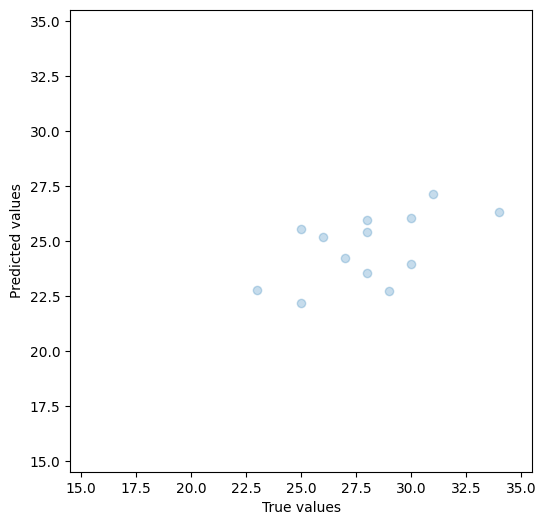

In [63]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter(y_test_q3, prediction_GBR_q3, alpha=0.25)
ax.set_xlabel("True values")
ax.set_ylabel("Predicted values")
plt.xlim([14.5, 35.5])
plt.ylim([14.5, 35.5])
plt.gca().set_aspect('equal', adjustable='box')

#### Beobachtung: 
Der Wert des Mean-Absolute-Erorrs ist mit ca. 3,41 für die wenigen Daten und dem Wertebereich gar nicht schlecht. Das Gradient Boosting Regressor Modell liefert meist sehr nahe Schätzungen an den echten Werten ist aber ähnlich wie das Random Forest Regressor Modell immer etwas unter dem wahren Wert. Dies ist auch in dem Graphen zu erkennen, da die Punkte recht linear angeordnet sind, aber immer etwas unter dem wahren Werten liegen.

### 3.2.5 Ergebnis
Das beste Modell ist somit mit einem Mean-Absolte-Error Wert von ca 2,35 der k-NN Regressor. Die Modelle Random Forest Regressor und Gradient Boosting Regressor lieferten ebenfalls gute Ergebnisse, waren aber etwas schlechter. Das Linear Regression Modell hingengen lieferte nicht wirklich gute Ergebnisse.

## 3.3 Bestes Modell für Frage 3
Das beste Modell für die Frage nach dem Alter der Proband*innen ist somit das folgende k-NN Regressor Modell.

In [64]:
best_model_q3 = grid_kNNR_q3.best_estimator_
best_model_q3.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model',
   KNeighborsRegressor(algorithm='ball_tree', leaf_size=3, n_neighbors=2, p=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(algorithm='ball_tree', leaf_size=3, n_neighbors=2, p=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'ball_tree',
 'model__leaf_size': 3,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 2,
 'model__p': 1,
 'model__weights': 'uniform'}